Notebook demonstrating how to perform *geometrical phase analysis* (GPA) of a series of atomic resolution images. The data used in this example is a defocus serie of simulated STEM HAADF images.

In [1]:
%matplotlib notebook
import hyperspy.api as hs

### Open data

In [2]:
s = hs.load('int-001-8-8-20-100-100-30.hspy')
s

<AtomicResolution, title: Defocus series of simulated STEM HAADF images, dimensions: (7|320, 320)>

<IPython.core.display.Javascript object>


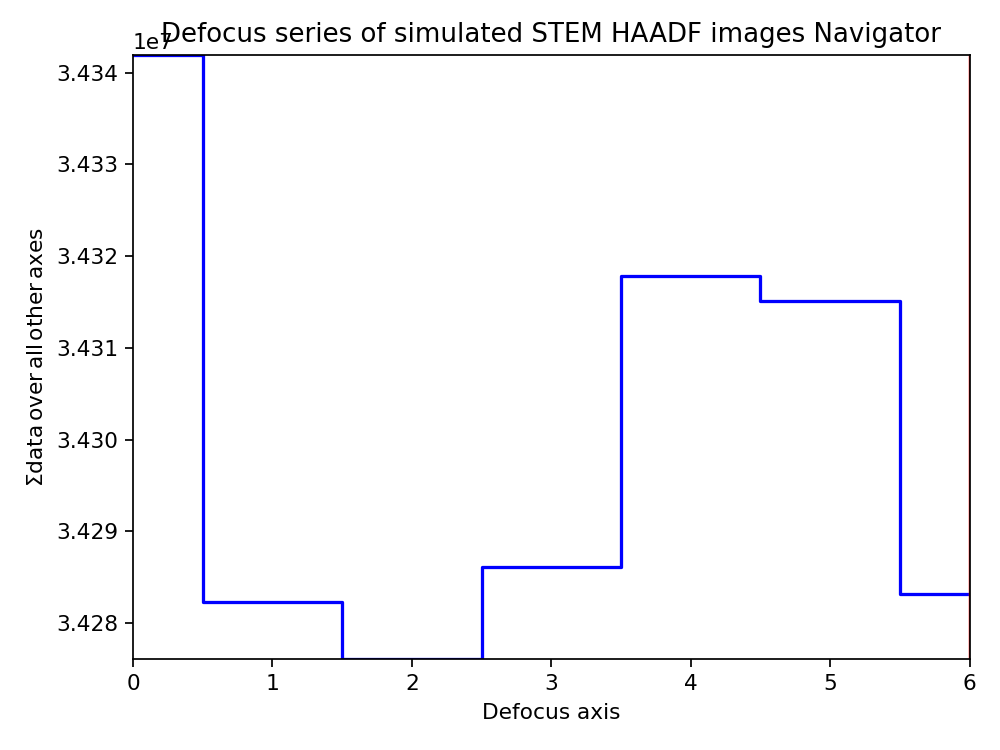

<IPython.core.display.Javascript object>


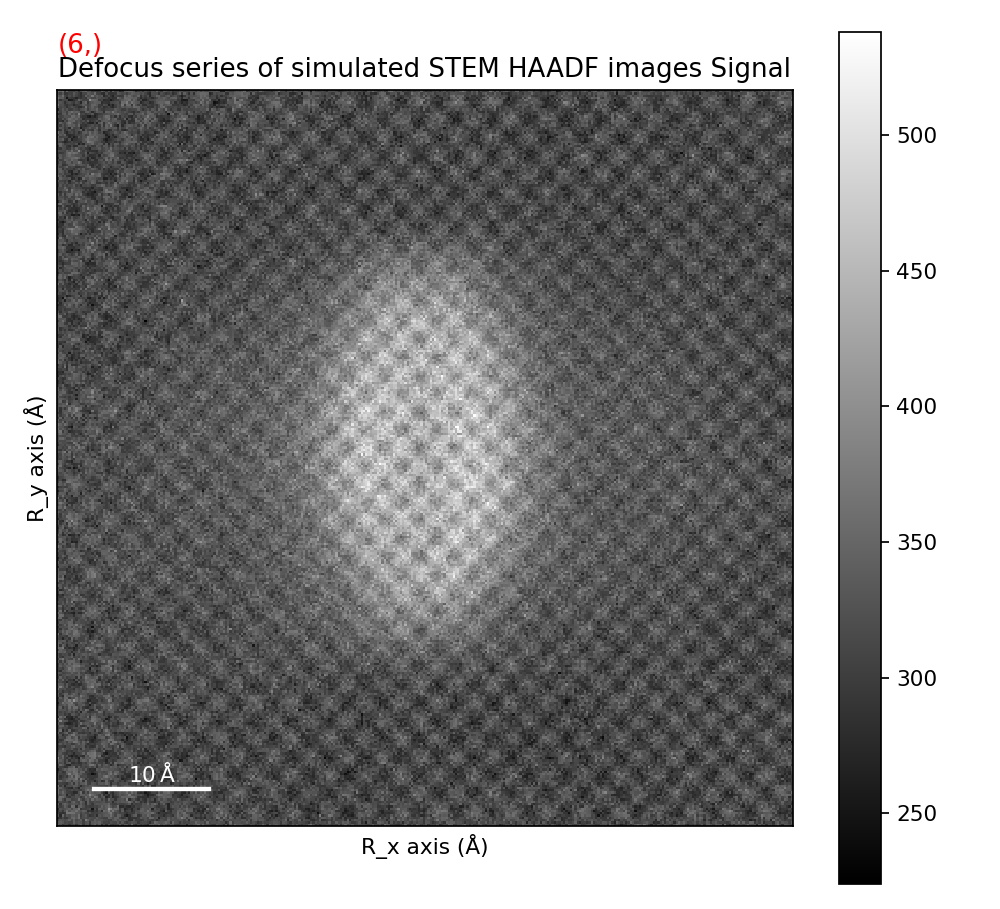

In [3]:
s.plot()

### Simulation metadata

The simulation parameters are saved in the `original_metadata` attribute

In [4]:
s.original_metadata

└── stack_elements
    ├── element0
    │   ├── metadata
    │   │   ├── General
    │   │   │   ├── original_filename = min-W-100-137-8-8-20-dir-100-npbc-prism.h5
    │   │   │   └── title = virtual_detector
    │   │   └── Signal
    │   │       ├── binned = False
    │   │       └── signal_type = 
    │   └── original_metadata
    │       ├── EMD_version = None
    │       └── simulation_parameters
    │           ├── C3 = 139299.5
    │           ├── C5 = -131240430.0
    │           ├── E0 = 100.0
    │           ├── algorithm = m
    │           ├── alphaBeamMax = 35.0
    │           ├── cellDimension = array([200.,  80.,  80.], dtype=float32)
    │           ├── detectorAngleStep = 1.0
    │           ├── filenameAtoms = min-W-100-137-8-8-20-dir-100-npbc-prism.xyz
    │           ├── includeOccupancy = 1
    │           ├── includeThermalEffects = 1
    │           ├── interpolationFactorX = 4
    │           ├── interpolationFactorY = 4
    │           ├── numFP = 30
    │           ├── numSlices = 0
    │           ├── nyquistSampling = 0
    │           ├── potBound = 2.0
    │           ├── probeDefocus = 0.0
    │           ├── probeSemiangle = 30.0
    │           ├── probeStepX = 0.2
    │           ├── probeStepY = 0.2
    │           ├── probeXtilt = 0.0
    │           ├── probeYtilt = 0.0
    │           ├── realspacePixelSizeX = 0.0881
    │           ├── realspacePixelSizeY = 0.0881
    │           ├── save3DOutput = 0
    │           ├── saveDPC_CoM = 0
    │           ├── savePotentialSlices = 0
    │           ├── scanWindowX = array([0.1, 0.9], dtype=float32)
    │           ├── scanWindowY = array([0.1, 0.9], dtype=float32)
    │           ├── sliceThickness = 1.5
    │           ├── tile = array([1., 1., 1.], dtype=float32)
    │           └── zStart = 0.0
    ├── element1
    │   ├── metadata
    │   │   ├── General
    │   │   │   ├── original_filename = min-W-100-137-8-8-20-dir-100-npbc-prism.h5
    │   │   │   └── title = virtual_detector
    │   │   └── Signal
    │   │       ├── binned = False
    │   │       └── signal_type = 
    │   └── original_metadata
    │       ├── EMD_version = None
    │       └── simulation_parameters
    │           ├── C3 = 139299.5
    │           ├── C5 = -131240430.0
    │           ├── E0 = 100.0
    │           ├── algorithm = m
    │           ├── alphaBeamMax = 35.0
    │           ├── cellDimension = array([200.,  80.,  80.], dtype=float32)
    │           ├── detectorAngleStep = 1.0
    │           ├── filenameAtoms = min-W-100-137-8-8-20-dir-100-npbc-prism.xyz
    │           ├── includeOccupancy = 1
    │           ├── includeThermalEffects = 1
    │           ├── interpolationFactorX = 4
    │           ├── interpolationFactorY = 4
    │           ├── numFP = 30
    │           ├── numSlices = 0
    │           ├── nyquistSampling = 0
    │           ├── potBound = 2.0
    │           ├── probeDefocus = -50.0
    │           ├── probeSemiangle = 30.0
    │           ├── probeStepX = 0.2
    │           ├── probeStepY = 0.2
    │           ├── probeXtilt = 0.0
    │           ├── probeYtilt = 0.0
    │           ├── realspacePixelSizeX = 0.0881
    │           ├── realspacePixelSizeY = 0.0881
    │           ├── save3DOutput = 0
    │           ├── saveDPC_CoM = 0
    │           ├── savePotentialSlices = 0
    │           ├── scanWindowX = array([0.1, 0.9], dtype=float32)
    │           ├── scanWindowY = array([0.1, 0.9], dtype=float32)
    │           ├── sliceThickness = 1.5
    │           ├── tile = array([1., 1., 1.], dtype=float32)
    │           └── zStart = 0.0
    ├── element2
    │   ├── metadata
    │   │   ├── General
    │   │   │   ├── original_filename = min-W-100-137-8-8-20-dir-100-npbc-prism.h5
    │   │   │   └── title = virtual_detector
    │   │   └── Signal
    │   │       ├── binned = False
    │   │       └── signal_type = 
    │   └── original_metadata
    │       ├── EMD_version = None
    │       └── simulation_parameters
   

### Set up GPA

In [5]:
gpa_tool = s.create_gpa_tool()
gpa_tool.set_fft()

<IPython.core.display.Javascript object>


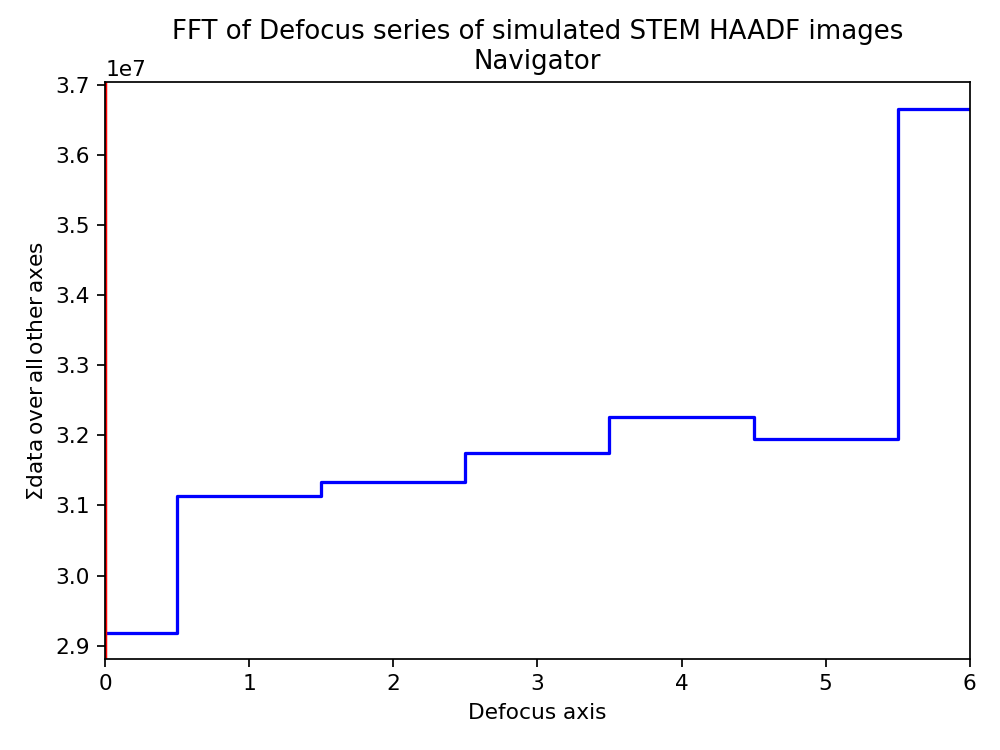

<IPython.core.display.Javascript object>


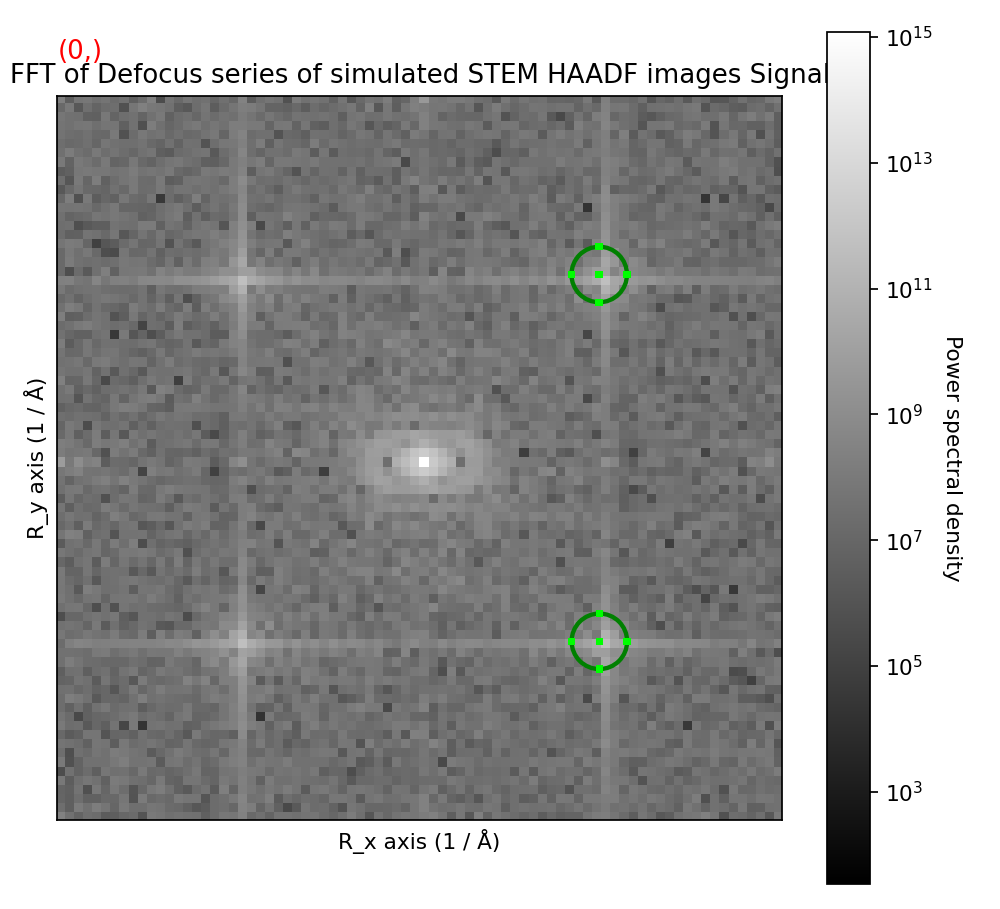

In [6]:
gpa_tool.plot_power_spectrum()

Add two circle to select the *g vectors* used for the GPA. If the power spectrum is plotted from the previous cell, the circle can be change interactively

In [7]:
# list of x, y, radius values for the two g vectors
g_rois = [[0.326, -0.304, 0.0955],
          [0.326, 0.324, 0.0955]]
gpa_tool.add_rois(g_rois)
gpa_tool.spatial_resolution = 10.0

In [8]:
gpa_tool.calculate_phase()

In [9]:
refinement_roi = [1., 5., 12., 29.]
gpa_tool.set_refinement_roi(refinement_roi)
gpa_tool.refine_phase()

In [13]:
gpa_tool.calculate_strain(angle=0)

In [14]:
md = s.original_metadata.stack_elements
defocus_values = [float(element[1].original_metadata.simulation_parameters.probeDefocus)
                  for element in md]
labels = [f'defocus: {defocus} Å' for defocus in defocus_values]
labels

['defocus: 0.0 Å',
 'defocus: -50.0 Å',
 'defocus: -75.0 Å',
 'defocus: -100.0 Å',
 'defocus: -125.0 Å',
 'defocus: -150.0 Å',
 'defocus: -200.0 Å']

### Display the strain maps

<IPython.core.display.Javascript object>


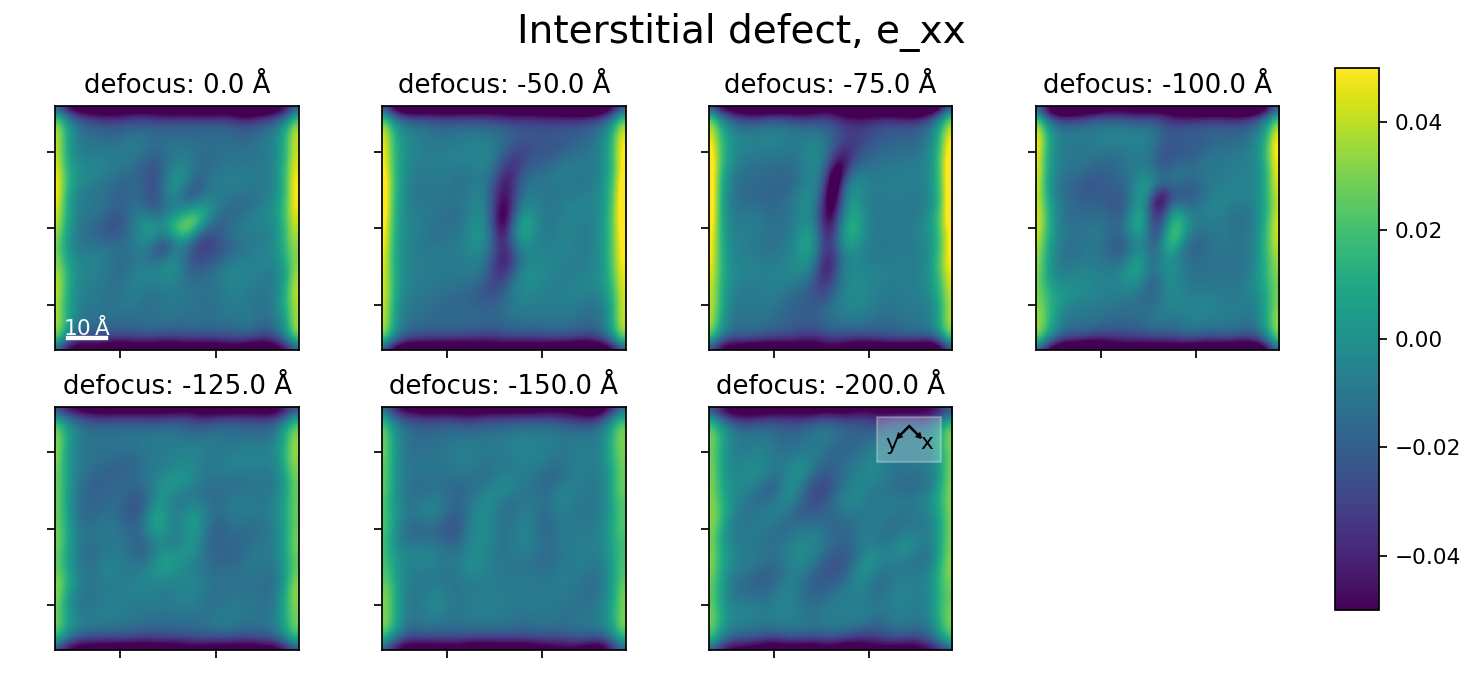

<IPython.core.display.Javascript object>


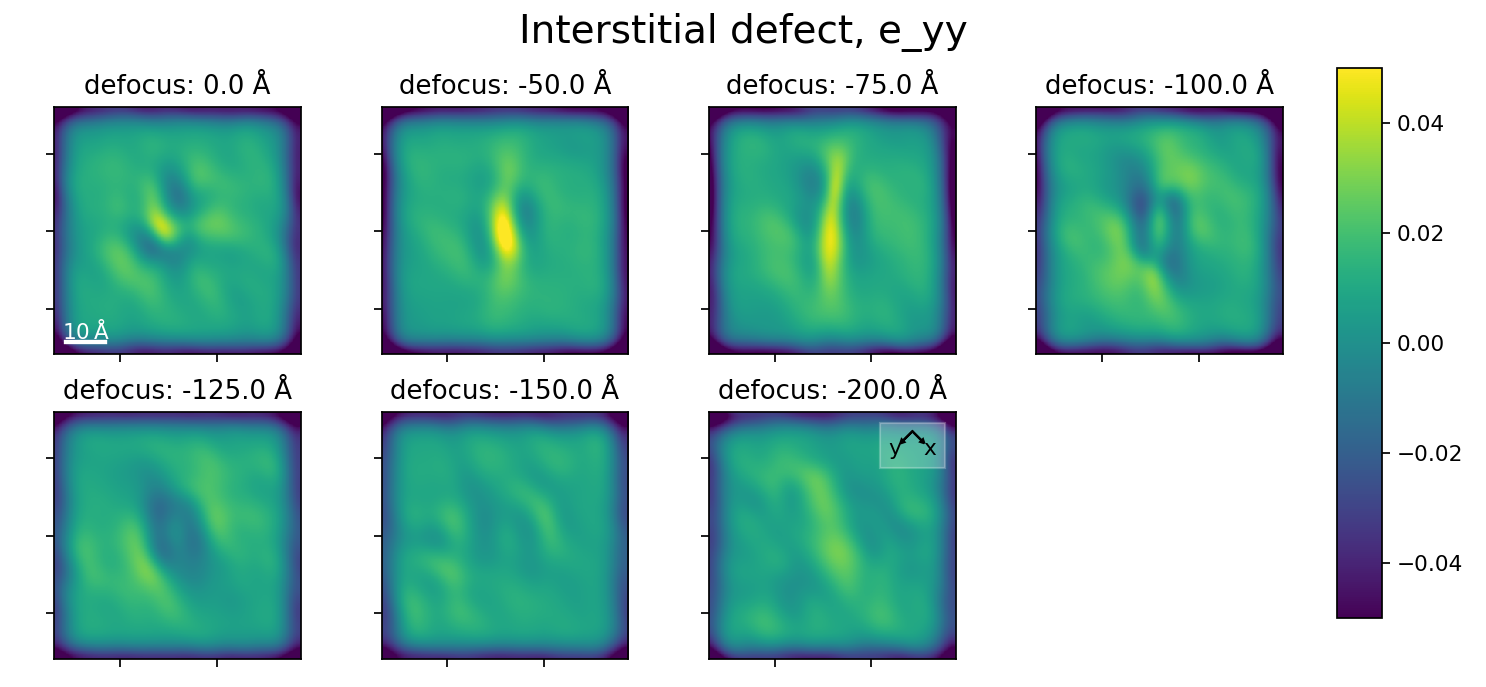

<IPython.core.display.Javascript object>


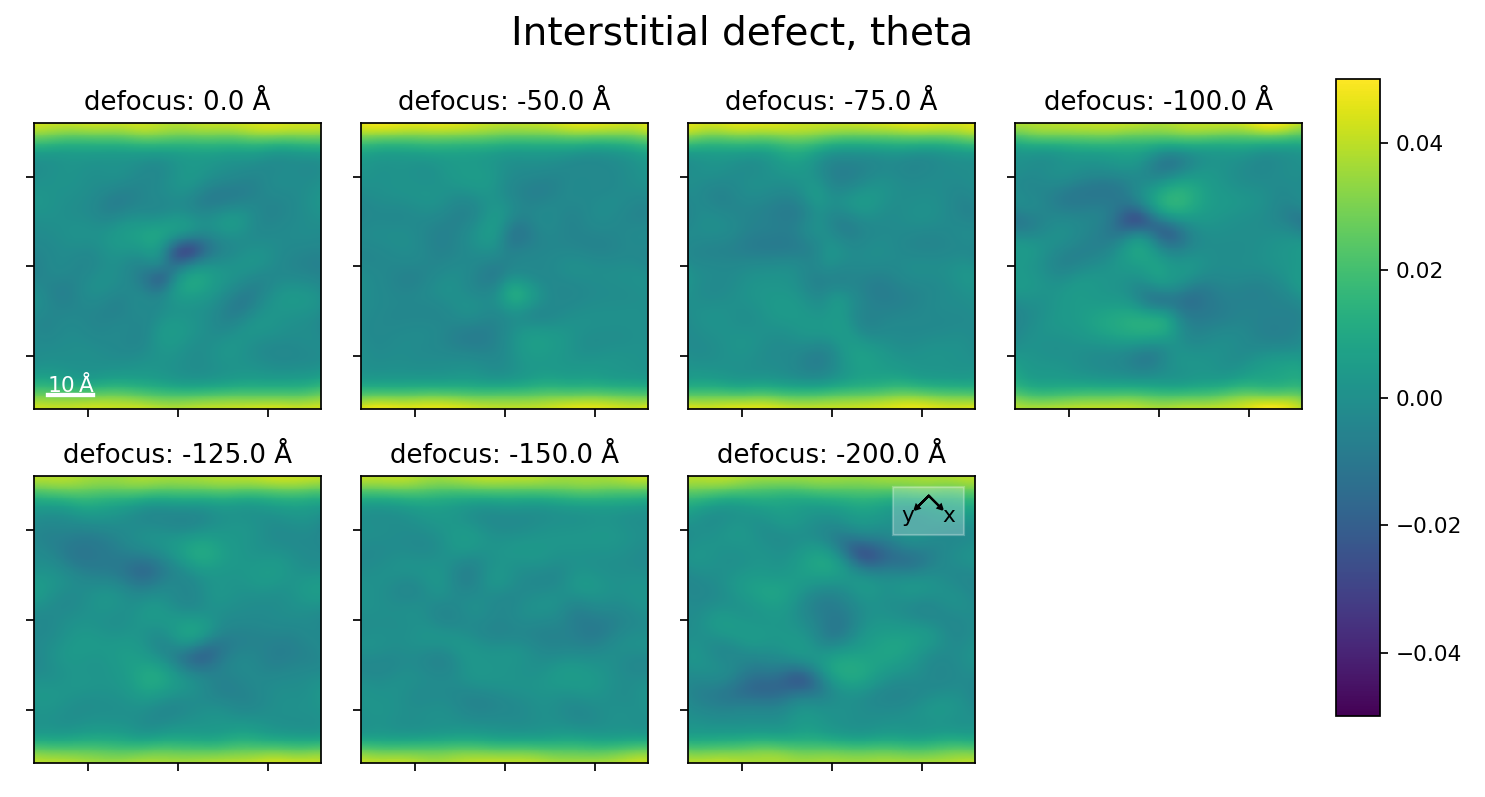

In [17]:
component_list = ['e_xx', 'e_yy', 'theta']
for component in component_list:
    gpa_tool.plot_strain(vmin=-0.05, vmax=0.05, components=component, threshold=None, per_row=4,
                         label=labels,  suptitle=f'Interstitial defect, {component}')